In [3]:
import pandas as pd
import numpy as np
import seaborn as sb

In [4]:
dataset= pd.read_excel('QVI_transaction_data.xlsx')

In [5]:
## Examine transaction data for first 5 rows data
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
## Convert DATE column to a date format
dataset['DATE'] = pd.to_datetime(dataset['DATE'], unit='D', origin='1899-12-30')
dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [14]:
## Check null value
dataset.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [15]:
## Check for nulls and possible outliers
dataset.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [37]:
## There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. 
## Filter the dataset to find the outlier
ft= (dataset['PROD_QTY'] == 200)
dataset[ft]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


<AxesSubplot: >

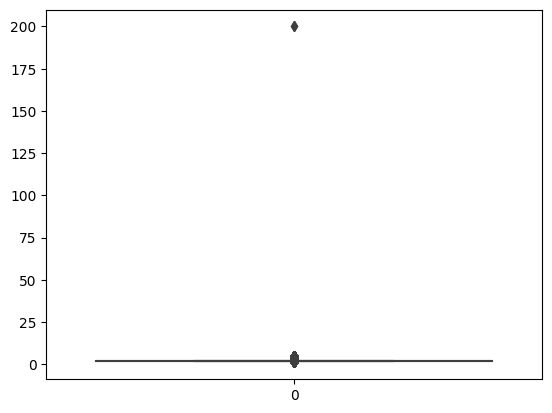

In [43]:
## Examine the distribution of PROD_QTY
sb.boxplot(dataset.PROD_QTY)

<AxesSubplot: >

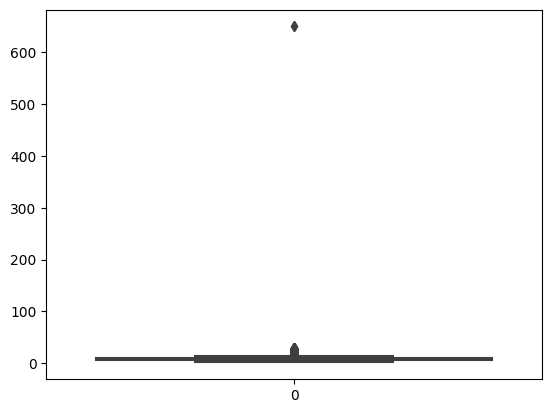

In [48]:
## Examine the distribution of TOT_SALES
sb.boxplot(dataset.TOT_SALES)

In [53]:
## There are two transactions where 200 packets of chips are bought in one transaction.
## Both of these transactions where by the same customer.
## Let's see if the customer has had other transactions
ft= (dataset['LYLTY_CARD_NBR'] == 226000)
dataset[ft]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
It looks like this customer has only had the two transactions over the year and is not an ordinary retail
customer. The customer might be buying chips for commercial purposes instead. We’ll remove this loyalty
card number from further analysis.

In [7]:
## Filter out the customer based on the loyalty card number
ft= (dataset['LYLTY_CARD_NBR'] != 226000)
dataset= dataset[ft]

## Re‐examine transaction data
dataset.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [143]:
## Count the number of transactions by date
dataset.groupby('DATE').size()

DATE
2018-07-01    724
2018-07-02    711
2018-07-03    722
2018-07-04    714
2018-07-05    712
             ... 
2019-06-26    723
2019-06-27    709
2019-06-28    730
2019-06-29    745
2019-06-30    744
Length: 364, dtype: int64

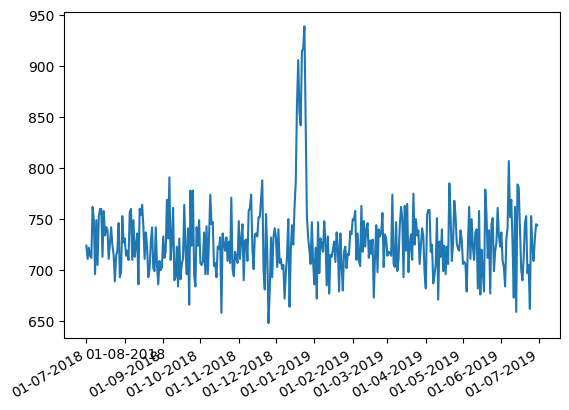

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df= dataset.groupby('DATE').size()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate() 
plt.plot(df)

In [9]:
## find out the missing date
time_range = pd.date_range(start="2018-07-01", end="2019-06-30")
print(time_range.difference(dataset['DATE']))

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


In [ ]:
The increase in sales occurs in the lead-up to Christmas and that there are zero sales on
Christmas day itself. This is due to shops being closed on Christmas day.

In [186]:
## Check if the pack sizes look sensible
dataset['pack_size']= dataset.PROD_NAME.str.extract('(\d+)')
df= dataset.groupby('pack_size', as_index=False).size()
df.columns=['pack_size','counts']
print(df)

   pack_size  counts
0        110   22387
1        125    1454
2        134   25102
3        135    3257
4        150   43131
5        160    2970
6        165   15297
7        170   19983
8        175   66390
9        180    1468
10       190    2995
11       200    4473
12       210    6272
13       220    1564
14       250    3169
15       270    6285
16       300   15166
17       330   12540
18       380    6416
19        70    1507
20        90    3008


In [49]:
## Check the output of the first few rows to see if we have indeed picked out pack size.
dataset['pack_size']= dataset.PROD_NAME.str.extract('(\d+)')
dataset[['pack_size','PROD_NAME']].head()

,pack_size,PROD_NAME
0,175,Natural Chip Compny SeaSalt175g
1,175,CCs Nacho Cheese 175g
2,170,Smiths Crinkle Cut Chips Chicken 170g
3,175,Smiths Chip Thinly S/Cream&Onion 175g
4,150,Kettle Tortilla ChpsHny&Jlpno Chili 150g


Text(0, 0.5, 'Conuts')

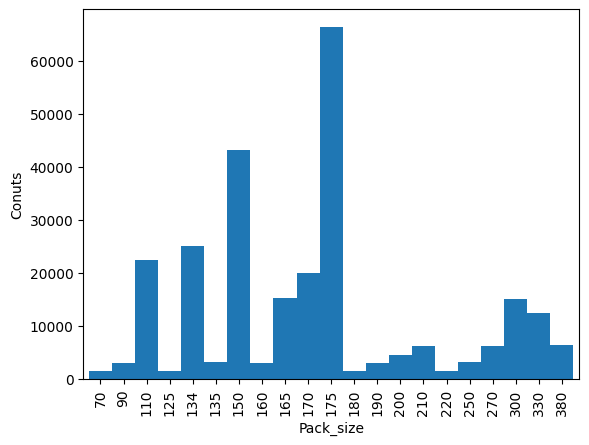

In [183]:
## Let's plot a histogram of PACK_SIZE since we know that it is a categorical variable and not a continuous variable even though it is numeric.
import matplotlib.pyplot as plt
import numpy as np
#count amounts for each pack size
df= dataset.groupby('pack_size', as_index=True).size()
#convert index(str) into values(int) for better sorting 
df.index = df.index.astype(int)
df=df.sort_index(ascending=True)
#plot bar chart
df.plot(kind='bar', width=1)
plt.xlabel('Pack_size')
plt.ylabel('Conuts')





In [210]:
## Create new column for Brands
dataset['Brand'] = dataset['PROD_NAME'].str.split(' ').str[0]
## Count amount for each brand
df= dataset.groupby('Brand', as_index=True).size()
df.sort_index()

Brand
Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
dtype: int64

In [ ]:
Some of the brand names look like they are of the same brands, such as WW and Woolworths

In [216]:
## Clean brand names
dataset.PROD_NAME.replace({'WW':'Woolworths','Dorito':'Doritos','Infzns':'Infuzions','Red':'RRD','Smith':'Smiths','Snbts':'Sunbites','NCC':'Natural'}, regex=True, inplace=True)

In [220]:
## Check again
dataset['Brand'] = dataset['PROD_NAME'].str.split(' ').str[0]
## Count amount for each brand
df= dataset.groupby('Brand', as_index=True).size()
df.sort_index()

Brand
Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Doritos       28145
French         1418
GrnWves        7740
Infuzions     14201
Kettle        41288
Natural        7469
Old            9324
Pringles      25102
RRD           17779
Smiths        31823
Sunbites       3008
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
Woolworths    14757
dtype: int64

In [221]:
## Examining customer data
dataset_2 = pd.read_csv('QVI_purchase_behaviour.csv')

In [222]:
## Examine customer data for first 5 rows data
dataset_2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [223]:
## Check null value
dataset_2.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [225]:
## Check for nulls and possible outliers
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [241]:
## Examining the values of lifestage and premium_customer
df= dataset_2.groupby('LIFESTAGE', as_index=False).size()
df.sort_values(by=['size'], ascending=False).reset_index(drop=True)

,LIFESTAGE,size
0,RETIREES,14805
1,OLDER SINGLES/COUPLES,14609
2,YOUNG SINGLES/COUPLES,14441
3,OLDER FAMILIES,9780
4,YOUNG FAMILIES,9178
5,MIDAGE SINGLES/COUPLES,7275
6,NEW FAMILIES,2549


In [242]:
df= dataset_2.groupby('PREMIUM_CUSTOMER', as_index=False).size()
df.sort_values(by=['size'], ascending=False).reset_index(drop=True)

,PREMIUM_CUSTOMER,size
0,Mainstream,29245
1,Budget,24470
2,Premium,18922


In [244]:
## check if LYLTY_CARD_NBR has dupo values
mask= dataset_2['LYLTY_CARD_NBR'].duplicated()
dataset_2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


In [246]:
dataset.groupby('LYLTY_CARD_NBR', as_index=False).size()

,LYLTY_CARD_NBR,size
0,1000,1
1,1002,1
2,1003,2
3,1004,1
4,1005,1
...,...,...
72631,2370651,1
72632,2370701,1
72633,2370751,1
72634,2370961,2


In [250]:
## find out the missing member, and the missing one is actually the one that hed been deleted.
id = dataset['LYLTY_CARD_NBR']
dataset_2.LYLTY_CARD_NBR.isin(id)
dataset_2[~dataset_2.LYLTY_CARD_NBR.isin(id)]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
59694,226000,OLDER FAMILIES,Premium


In [254]:
#### Merge transaction data to customer data
left =dataset
right = dataset_2
data_merge = pd.merge(left, right, on=["LYLTY_CARD_NBR"])
data_merge.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,"(pack_size, PROD_NAME)",Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,Woolworths Original Stacked Chips 160g,2,3.8,160,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [258]:
#### Check if merged data is correct
ft = dataset_2['LYLTY_CARD_NBR'] ==1343
dataset_2[ft]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
224,1343,MIDAGE SINGLES/COUPLES,Budget


In [259]:
## export merge result.
data_merge.to_csv(r'C:\python trainning\Scripts\data_merge.csv', index=False, header=True)

In [266]:
## Examining merge data
data_m = pd.read_csv(data_merge.csv)

                Lifestage     Budget  Mainstream    Premium
0  MIDAGE SINGLES/COUPLES   35514.80    90803.85   58432.65
1            NEW FAMILIES   21928.45    17013.90   11491.10
2          OLDER FAMILIES  168363.25   103445.55   80658.40
3   OLDER SINGLES/COUPLES  136769.80   133393.80  132263.15
4                RETIREES  113147.80   155677.05   97646.05
5          YOUNG FAMILIES  139345.85    92788.75   84025.50
6   YOUNG SINGLES/COUPLES   61141.60   157621.60   41642.10


Text(0, 0.5, 'TOTAL SALES')

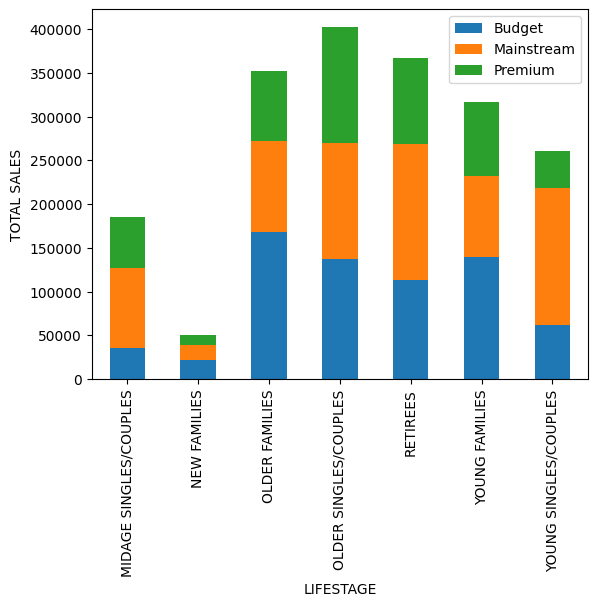

In [388]:
da= data_m.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index=False)['TOT_SALES'].sum()
Budget= da[da['PREMIUM_CUSTOMER'] =='Budget']['TOT_SALES']
Mainstream= da[da['PREMIUM_CUSTOMER'] =='Mainstream']['TOT_SALES']
Premium= da[da['PREMIUM_CUSTOMER'] =='Premium']['TOT_SALES']
B= Budget.reset_index(drop=True).to_list()
M=Mainstream.reset_index(drop=True).to_list()
P=Premium.reset_index(drop=True).to_list()
L=['MIDAGE SINGLES/COUPLES','NEW FAMILIES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']


df = pd.DataFrame(list(zip(L, B, M, P)), columns =['Lifestage','Budget', 'Mainstream','Premium'])
print(df)

df.plot.bar(x= 'Lifestage', stacked=True)
plt.xlabel('LIFESTAGE')
plt.ylabel('TOTAL SALES')


## Older families and retires in general buy more chips per customer

In [412]:
## Find target customer segments that contribute the most to sales
## Deep dive into Mainstream, young singles/couples
ft1= (data_m['LIFESTAGE'] =='YOUNG SINGLES/COUPLES')
ft2= (data_m['PREMIUM_CUSTOMER'] =='Mainstream')
seg= data_m[ft1 & ft2]
other= data_m[~ft1 & ~ft2]

In [414]:
seg_sum=seg['PROD_QTY'].sum()
other_sum=other['PROD_QTY'].sum()
print(seg_sum)
print(other_sum)

38632
282757


         Brand  TargetSegment     Other  affinityToBrand
19    Tyrrells       0.029587  0.023968         1.234454
18    Twisties       0.043306  0.035355         1.224877
9       Kettle       0.185649  0.155243         1.195863
17    Tostitos       0.042581  0.035744         1.191269
11         Old       0.041598  0.034931         1.190850
12    Pringles       0.111980  0.094240         1.188241
4         Cobs       0.041856  0.035836         1.167987
5      Doritos       0.122877  0.105278         1.167174
8    Infuzions       0.060649  0.053509         1.133443
16       Thins       0.056611  0.053275         1.062612
7      GrnWves       0.030674  0.028958         1.059270
3     Cheezels       0.016851  0.017619         0.956409
14      Smiths       0.093420  0.121327         0.769986
6       French       0.003702  0.005319         0.695912
2      Cheetos       0.007533  0.010960         0.687286
13         RRD       0.045377  0.068310         0.664283
10     Natural       0.018379  

Text(0, 0.5, 'AffinityToBrand')

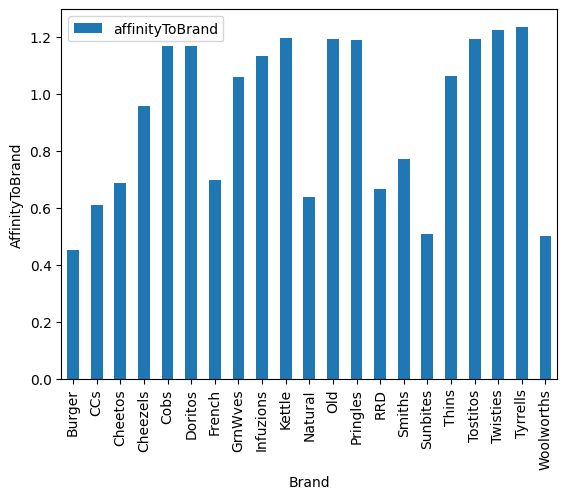

In [436]:
## Brand affinity compared to the rest of the population
seg_aff= seg.groupby(['Brand'],as_index=False).sum()
seg_aff['TargetSegment']=seg_aff['PROD_QTY']/seg_sum
seg_aff.sort_values(by=['TargetSegment'], ascending=False).reset_index(drop=True)
tar_seg= seg_aff[['Brand','TargetSegment']]

other_aff= other.groupby(['Brand'],as_index=False).sum()
other_aff['Other']=other_aff['PROD_QTY']/other_sum
other_aff.sort_values(by=['Other'], ascending=False).reset_index(drop=True)
other_seg= other_aff[['Brand','Other']]

## Merge target segment and other
left =tar_seg
right = other_seg
data_merge = pd.merge(left, right, on=["Brand"])
data_merge['AffinityToBrand']=data_merge['TargetSegment']/data_merge['Other']
print(data_merge.sort_values(by=['AffinityToBrand'],ascending=False))
## plot bar chart
data_merge.plot(kind='bar', x="Brand", y='AffinityToBrand')
plt.xlabel('Brand')
plt.ylabel('AffinityToBrand')


In [ ]:
We can see that :
• Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population
• Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population

    pack_size  TargetSegment     Other  AffinityToPack
17        270       0.029846  0.023366        1.277295
20        380       0.030156  0.023964        1.258400
19        330       0.057465  0.047511        1.209522
2         110       0.099658  0.083489        1.193675
4         134       0.111980  0.094240        1.188241
14        210       0.027309  0.023200        1.177104
5         135       0.013849  0.012053        1.149001
16        250       0.013460  0.011989        1.122716
9         170       0.075740  0.074888        1.011386
18        300       0.054954  0.056709        0.969052
6         150       0.155130  0.163228        0.950388
10        175       0.239102  0.253012        0.945022
8         165       0.052185  0.057403        0.909100
12        190       0.007015  0.011307        0.620430
11        180       0.003365  0.005758        0.584460
7         160       0.006005  0.011391        0.527185
3         125       0.002821  0.005570        0.506538
1         

Text(0, 0.5, 'AffinityToPack')

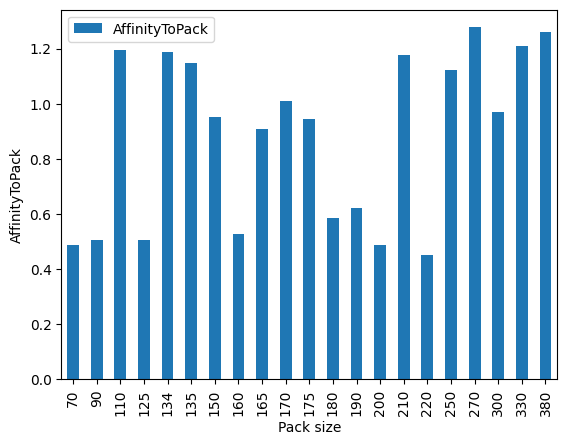

In [443]:
## To find out if our target segment tends to buy larger packs of chips.
## Preferred pack size compared to the rest of the population

quantity_segment1_by_pack= seg.groupby(['pack_size'],as_index=False).sum()
quantity_segment1_by_pack['TargetSegment']=quantity_segment1_by_pack['PROD_QTY']/seg_sum
quantity_segment1_by_pack.sort_values(by=['TargetSegment'], ascending=False).reset_index(drop=True)
tar_seg_by_pack= quantity_segment1_by_pack[['pack_size','TargetSegment']]

other_by_pack= other.groupby(['pack_size'],as_index=False).sum()
other_by_pack['Other']=other_by_pack['PROD_QTY']/other_sum
other_by_pack.sort_values(by=['Other'], ascending=False).reset_index(drop=True)
other_seg_by_pack= other_by_pack[['pack_size','Other']]

## Merge target segment and other
left =tar_seg_by_pack
right = other_seg_by_pack
data_merge = pd.merge(left, right, on=["pack_size"])
data_merge['AffinityToPack']=data_merge['TargetSegment']/data_merge['Other']
print(data_merge.sort_values(by=['AffinityToPack'],ascending=False))
## plot bar chart
data_merge.plot(kind='bar', x="pack_size", y='AffinityToPack')
plt.xlabel('Pack size')
plt.ylabel('AffinityToPack')

In [ ]:
It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared
to the rest of the population but let’s dive into what brands sell this pack size.

In [451]:
## To find the brands sell pack size 270g.
seg_270g= seg[seg['pack_size'] == 270]
seg_pro_270g=seg_270g.groupby(['PROD_NAME'],as_index=False).size()
print(seg_pro_270g)


## Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.


                  PROD_NAME  size
0  Twisties Cheese     270g   315
1      Twisties Chicken270g   305


In [ ]:
Conclusion

•Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
  -retirees shoppers. 
    
•Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
  compared to the rest of the population. The Category Manager may want to increase the category’s performance
  by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
  where young singles and couples frequent more often to increase visibilty and impulse behaviour.

•Mainstream young singles and couples are 27% more tends to buy larger packs of chips of 270g and Tyrrells is 
  the only brand offering this packs size so this may instead be reflecting a higher likelihood of purchasing Twisties.

•Quantium can help the Category Manager with recommendations of where these segments are and further
  help them with measuring the impact of the changed placement.